In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

23392


In [37]:
from ImageAnalysis3.figure_tools import _dpi,_single_col_width,_double_col_width,_single_row_height,_ref_bar_length, _ticklabel_size,_ticklabel_width,_font_size
plt.style.use('dark_background')


In [39]:
figure_folder = r'D:\20220611-Plots'
distmap_figure_folder = os.path.join(figure_folder, 'Celltype_Distmap')
if not os.path.exists(distmap_figure_folder):
    os.makedirs(distmap_figure_folder)

In [13]:
import pandas as pd
codebook = pd.read_csv(r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\20220402plus0316_MERFISH\merged_codebook_w_celltype.csv')
bit_columns = [_n for _n in codebook.columns if 'NDB' in _n]

In [58]:
median_dict = np.load(r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\20220402plus0316_MERFISH\0402plus0316_class_2_summary_dict_nonnan100',
                    allow_pickle=True)
count_dict = np.load(r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\20220402plus0316_MERFISH\0402plus0316_class_2_len.pkl',
                    allow_pickle=True)

<IPython.core.display.Javascript object>


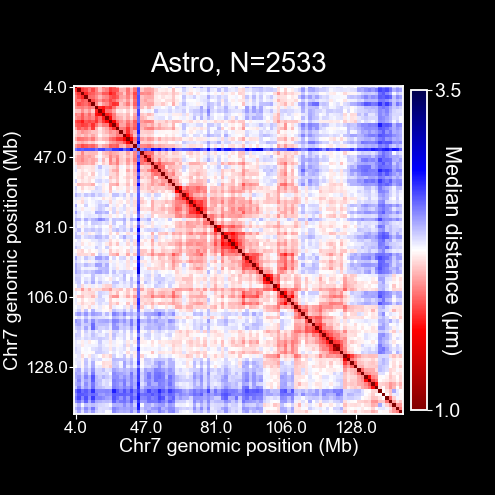

<IPython.core.display.Javascript object>


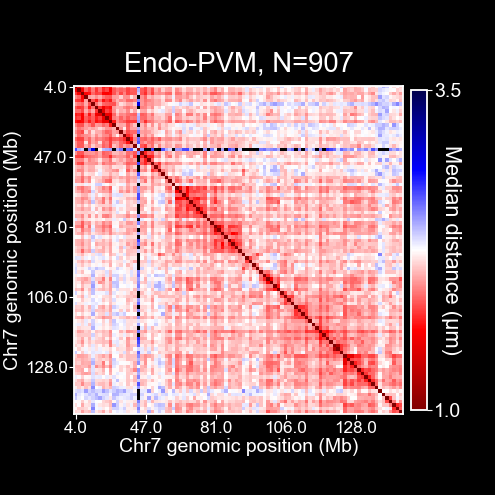

<IPython.core.display.Javascript object>


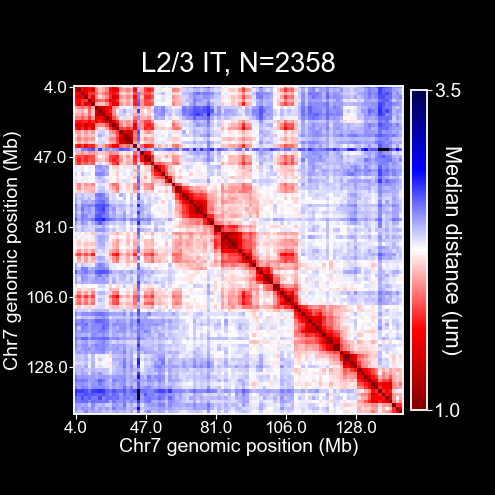

<IPython.core.display.Javascript object>


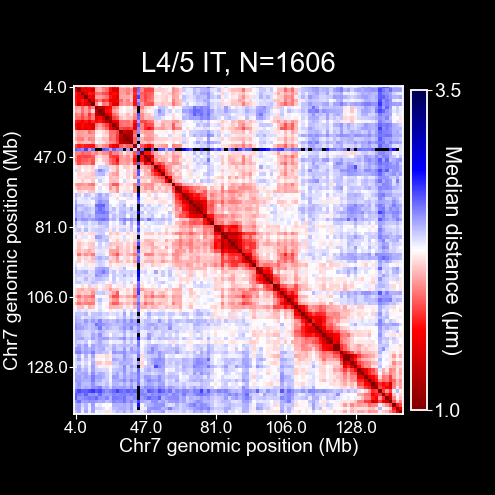

<IPython.core.display.Javascript object>


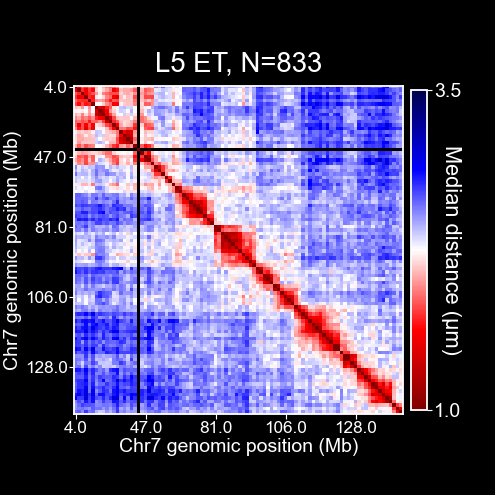

<IPython.core.display.Javascript object>


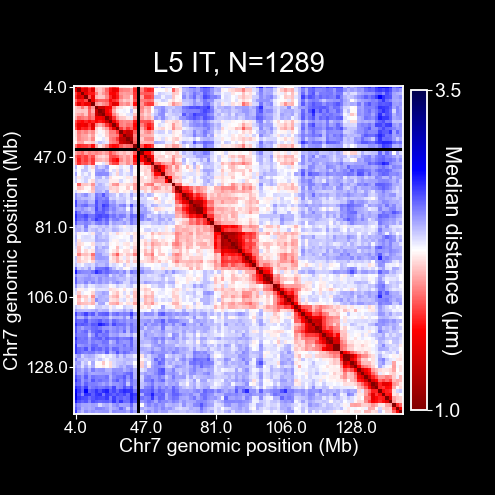

<IPython.core.display.Javascript object>


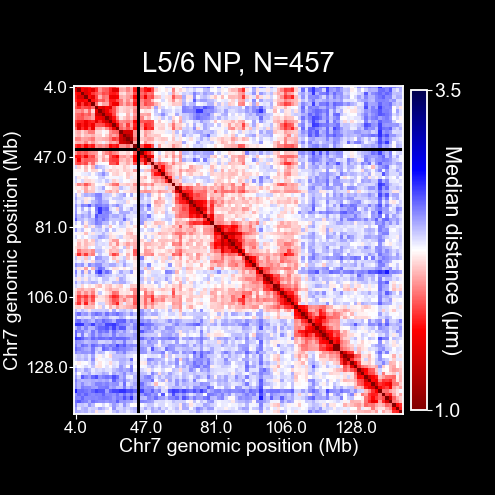

<IPython.core.display.Javascript object>


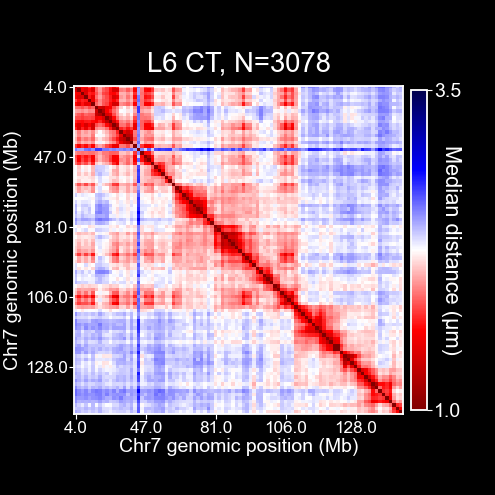

<IPython.core.display.Javascript object>


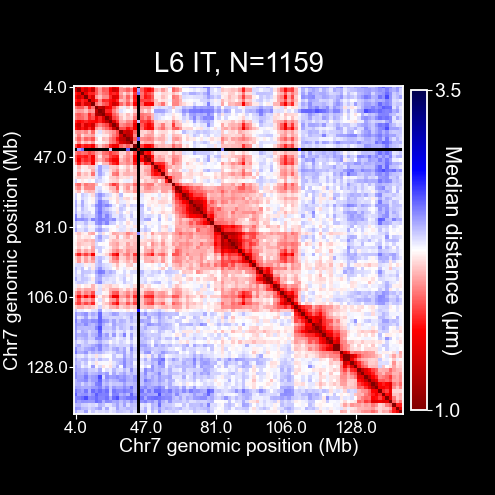

<IPython.core.display.Javascript object>


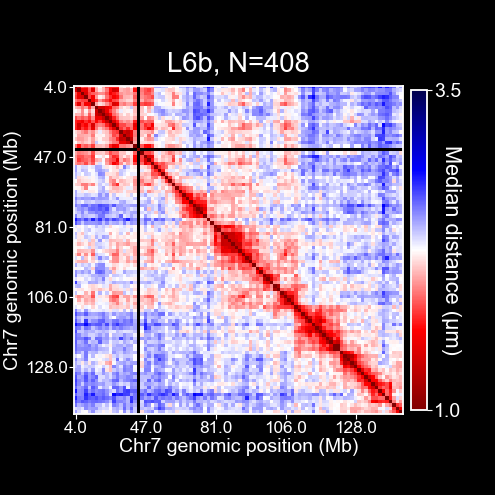

<IPython.core.display.Javascript object>


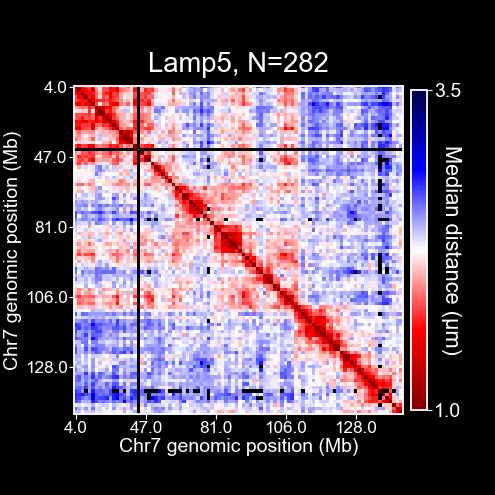

<IPython.core.display.Javascript object>


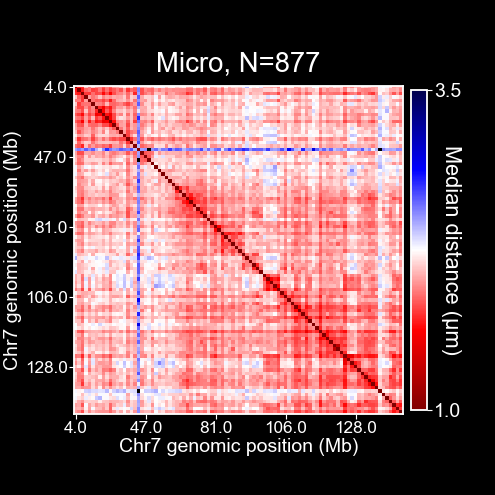

<IPython.core.display.Javascript object>


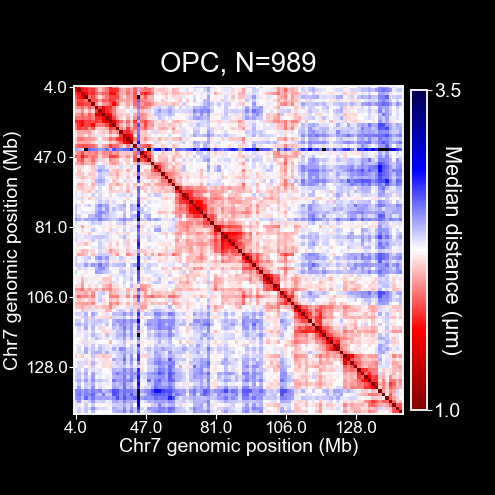

<IPython.core.display.Javascript object>


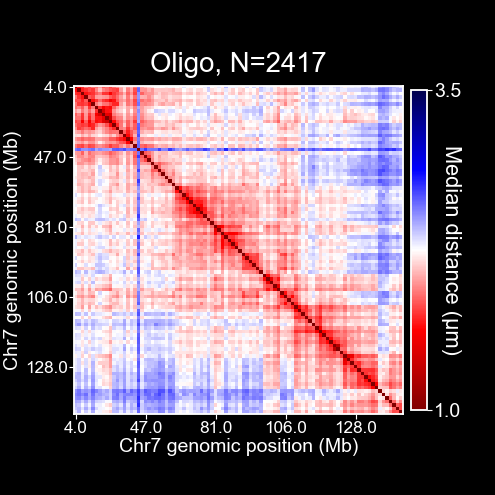

<IPython.core.display.Javascript object>


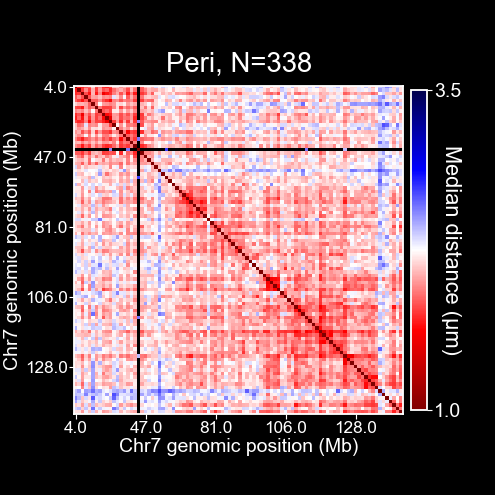

<IPython.core.display.Javascript object>


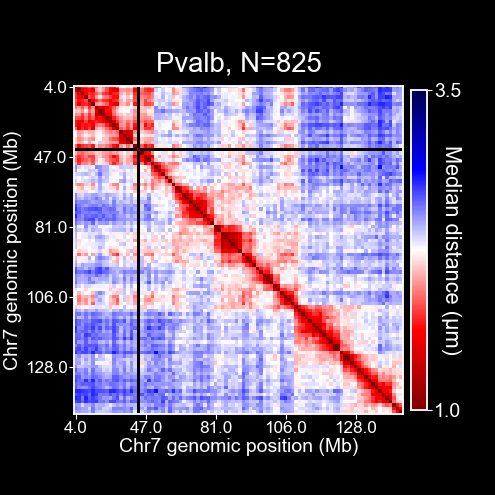

C:\Users\puzheng\AppData\Local\Temp/ipykernel_23392/1395342415.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, _ax = plt.subplots(figsize=(3,3), dpi=150)


<IPython.core.display.Javascript object>


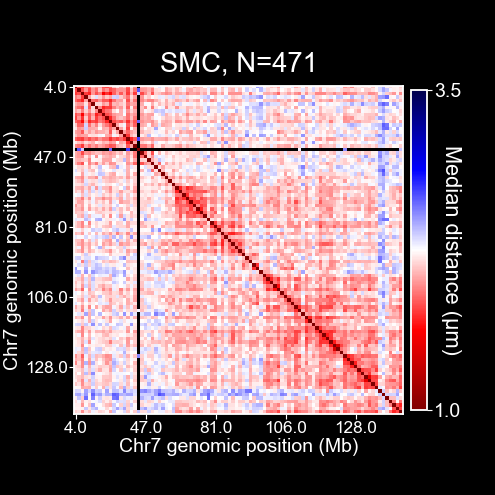

<IPython.core.display.Javascript object>


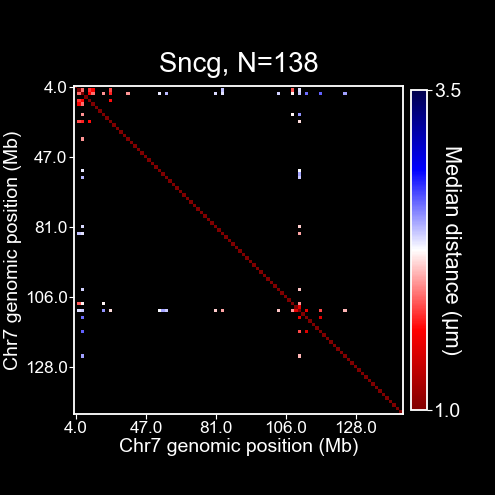

<IPython.core.display.Javascript object>


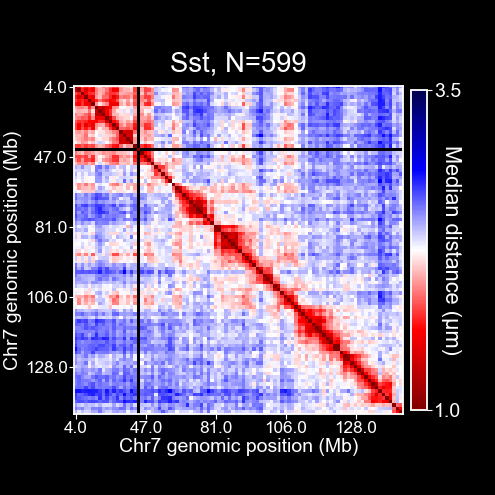

<IPython.core.display.Javascript object>


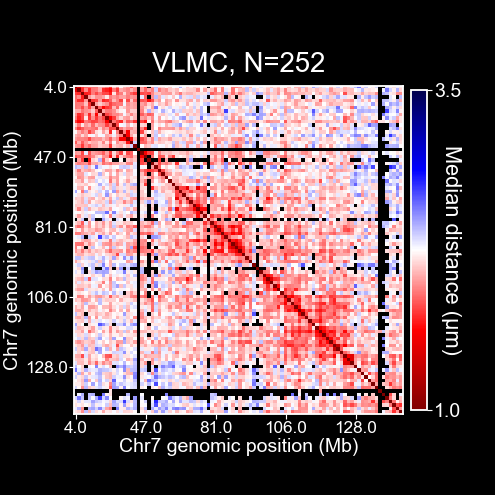

<IPython.core.display.Javascript object>


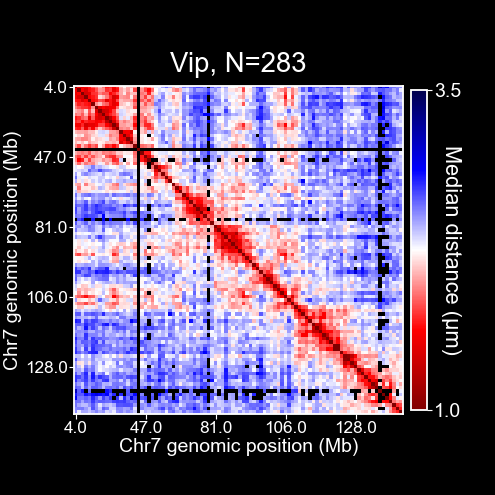

<IPython.core.display.Javascript object>


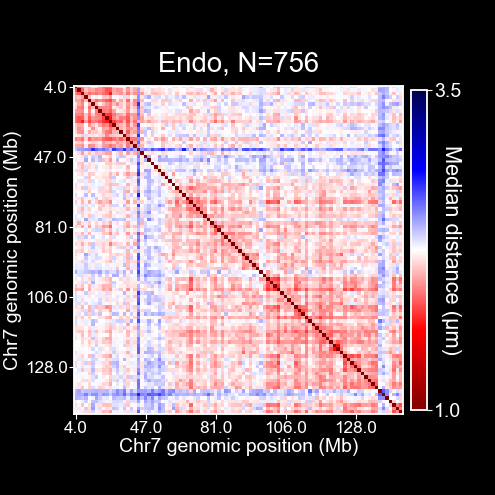

In [59]:
sel_feature = 'cis_7'
c1,c2 = 7,7
_font_size = 7.5
vmin,vmax = 1, 3.5
c1_codebook = codebook.loc[codebook['chr']==str(c1)].sort_values('chr_order')
c2_codebook = codebook.loc[codebook['chr']==str(c2)].sort_values('chr_order')

c1_ticks = np.arange(0, len(c1_codebook), 20)
c2_ticks = np.arange(0, len(c2_codebook), 20)
c1_starts = np.round([int(_name.split(':')[1].split('-')[0])/1e6 for _name in c1_codebook['name'] ])
c2_starts = np.round([int(_name.split(':')[1].split('-')[0])/1e6 for _name in c2_codebook['name'] ])

for _type, _ChrPair_2_Summary in median_dict.items():
    _mat = _ChrPair_2_Summary[sel_feature]/1000
    fig, _ax = plt.subplots(figsize=(3,3), dpi=150)

    _pf = _ax.imshow(_mat, cmap='seismic_r', vmin=vmin, vmax=vmax)
    # get ticks
    _ax.set_yticks(c1_ticks)
    _ax.set_yticklabels(c1_starts[c1_ticks])
    _ax.set_ylabel(f"Chr{c1} genomic position (Mb)", fontsize=_font_size+1, labelpad=1)
    _ax.set_xticks(c2_ticks)
    _ax.set_xticklabels(c2_starts[c2_ticks])
    _ax.set_xlabel(f"Chr{c2} genomic position (Mb)", fontsize=_font_size+1, labelpad=1)
    _ax.tick_params('both', labelsize=_font_size, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, ) # remove bottom ticklabels for ax1
    _ax.set_title(f"{_type}, N={count_dict[_type]}")
    cbar = plt.colorbar(_pf, ax=_ax, shrink=0.84, ticks=[vmin,vmax], pad=0.02)
    cbar.set_label('Median distance (\u03BCm)', 
                   fontsize=_font_size+2, labelpad=0, rotation=270)
    cbar.ax.tick_params('both', labelsize=_font_size+1, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, ) # remove bottom ticklabels for ax1
    plt.gcf().subplots_adjust(left=0.15,right=0.95)
    # save pdf and png
    fig.savefig(os.path.join(distmap_figure_folder, f"Median_{_type.replace(' ', '_').replace(r'/', '-')}.pdf"),
                transparent=True)
    fig.savefig(os.path.join(distmap_figure_folder, f"Median_{_type.replace(' ', '_').replace(r'/', '-')}.png"),
                transparent=True)
    fig.show()
    

# Major classes

In [49]:
median_dict = np.load(r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\20220402plus0316_MERFISH\0402plus0316_major_4class_2_summary_dict_nonnan100',
                    allow_pickle=True)
count_dict = np.load(r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\20220402plus0316_MERFISH\0402plus0316_major_4class_2_len.pkl',
                    allow_pickle=True)

<IPython.core.display.Javascript object>


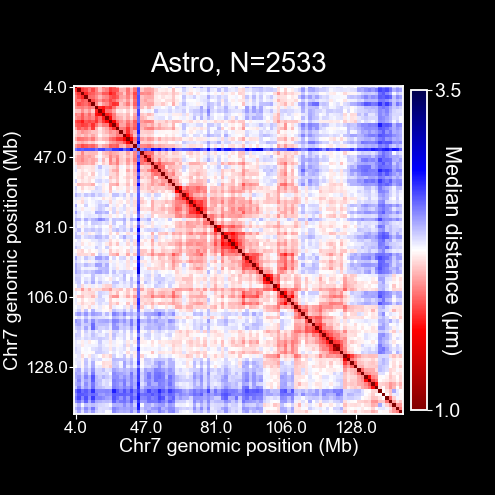

<IPython.core.display.Javascript object>


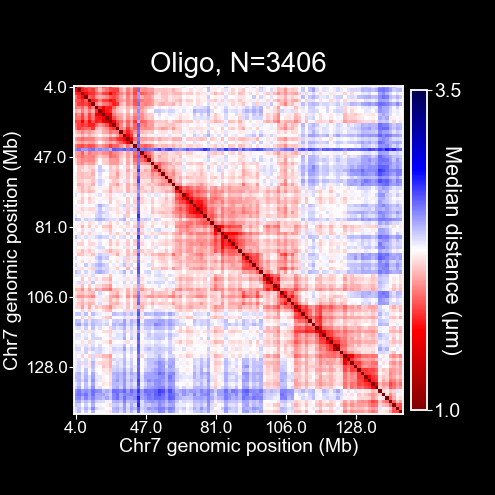

<IPython.core.display.Javascript object>


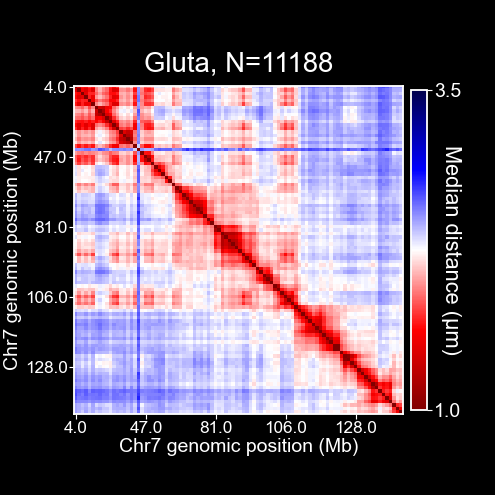

<IPython.core.display.Javascript object>


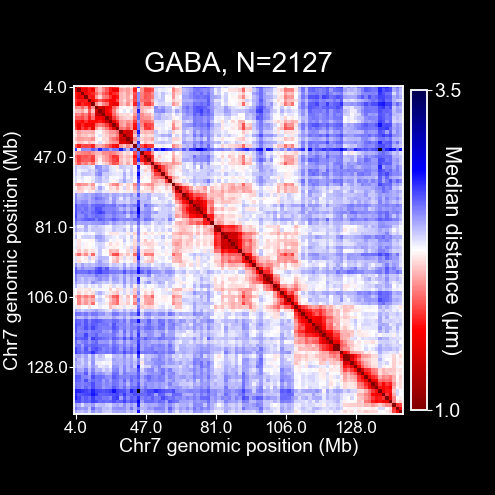

In [57]:
sel_feature = 'cis_7'
c1,c2 = 7,7
_font_size = 7.5
vmin,vmax = 1, 3.5
c1_codebook = codebook.loc[codebook['chr']==str(c1)].sort_values('chr_order')
c2_codebook = codebook.loc[codebook['chr']==str(c2)].sort_values('chr_order')

c1_ticks = np.arange(0, len(c1_codebook), 20)
c2_ticks = np.arange(0, len(c2_codebook), 20)
c1_starts = np.round([int(_name.split(':')[1].split('-')[0])/1e6 for _name in c1_codebook['name'] ])
c2_starts = np.round([int(_name.split(':')[1].split('-')[0])/1e6 for _name in c2_codebook['name'] ])

for _type, _ChrPair_2_Summary in median_dict.items():
    _mat = _ChrPair_2_Summary[sel_feature]/1000
    fig, _ax = plt.subplots(figsize=(3,3), dpi=150)

    _pf = _ax.imshow(_mat, cmap='seismic_r', vmin=vmin, vmax=vmax)
    # get ticks
    _ax.set_yticks(c1_ticks)
    _ax.set_yticklabels(c1_starts[c1_ticks])
    _ax.set_ylabel(f"Chr{c1} genomic position (Mb)", fontsize=_font_size+1, labelpad=1)
    _ax.set_xticks(c2_ticks)
    _ax.set_xticklabels(c2_starts[c2_ticks])
    _ax.set_xlabel(f"Chr{c2} genomic position (Mb)", fontsize=_font_size+1, labelpad=1)
    _ax.tick_params('both', labelsize=_font_size, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, ) # remove bottom ticklabels for ax1
    _ax.set_title(f"{_type}, N={count_dict[_type]}")
    cbar = plt.colorbar(_pf, ax=_ax, shrink=0.84, ticks=[vmin,vmax], pad=0.02)
    cbar.set_label('Median distance (\u03BCm)', 
                   fontsize=_font_size+2, labelpad=0, rotation=270)
    cbar.ax.tick_params('both', labelsize=_font_size+1, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, ) # remove bottom ticklabels for ax1
    plt.gcf().subplots_adjust(left=0.15,right=0.95)
    # save pdf and png
    fig.savefig(os.path.join(distmap_figure_folder, f"Median_Major4_{_type.replace(' ', '_').replace(r'/', '-')}.pdf"),
                transparent=True)
    fig.savefig(os.path.join(distmap_figure_folder, f"Median_Major4_{_type.replace(' ', '_').replace(r'/', '-')}.png"),
                transparent=True)
    fig.show()
